<a href="https://colab.research.google.com/github/unachankz/goto_data_science/blob/master/notebook/sin_wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import math
import numpy as np
import cv2

In [2]:
def normalize_img(s):
    start = 0
    end = 255
    width = end - start
    res = (s - s.min())/(s.max() - s.min()) * width + start
    return res

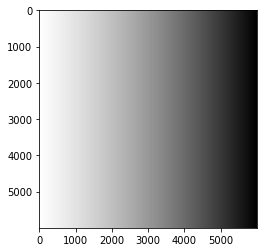

In [22]:
# Vertical
A = 10

f = 7
t = np.linspace(0,6000,6000) # for loop 1-100 and / 100 each time
phi = np.pi/300
x = normalize_img(A*np.cos(0.0000001*np.pi*f*t + phi)) # 1d sine
sinusoid = np.array([x]*len(t)).astype(np.float32) # cv::Mat 100 * 100, 1-row copy of x, 2-row
plt.imshow(sinusoid,"gray")

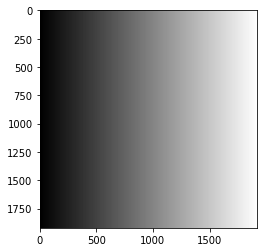

In [92]:
# Vertical
A = 0.1

f = 7
t = np.linspace(0,1920,1920) # for loop 1-100 and / 100 each time
phi = np.pi/300
x = normalize_img(A*np.sin(0.000000001*np.pi*f*t + phi)) # 1d sine
sinusoid = np.array([x]*len(t)).astype(np.float32) # cv::Mat 100 * 100, 1-row copy of x, 2-row
plt.imshow(sinusoid,"gray")

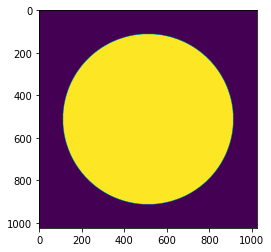

In [75]:
circle_img=cv2.circle(np.zeros((1024,1024)), (512, 512), 400, (255), thickness=-1)
plt.imshow(circle_img)

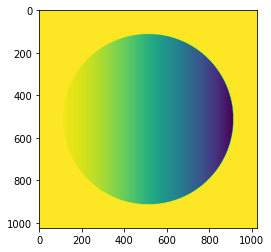

In [50]:
plt.imshow(A*np.cos(0.0000003*circle_img*np.pi*f*t + phi))

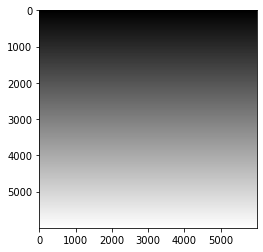

In [76]:
sinusoid2 = sinusoid.transpose()

plt.imshow(sinusoid2,"gray")

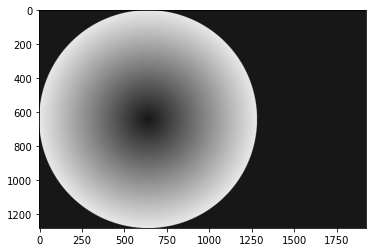

In [87]:
# 逆変換(リニア)
flags = cv2.INTER_CUBIC + cv2.WARP_FILL_OUTLIERS + cv2.WARP_POLAR_LINEAR + cv2.WARP_INVERSE_MAP
circle_sine = cv2.warpPolar(sinusoid, (1920,1280), (640, 640), 640, flags)
plt.imshow(circle_sine,"gray")

In [78]:
!wget https://smout-uploads.imgix.net/uploads/city/image/1772/gotoushi.jpg

--2021-07-20 12:24:46--  https://smout-uploads.imgix.net/uploads/city/image/1772/gotoushi.jpg
Resolving smout-uploads.imgix.net (smout-uploads.imgix.net)... 151.101.38.208, 2a04:4e42:9::720
Connecting to smout-uploads.imgix.net (smout-uploads.imgix.net)|151.101.38.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 174647 (171K) [image/jpeg]
Saving to: ‘gotoushi.jpg’

gotoushi.jpg        100%[===================>] 170.55K  --.-KB/s    in 0.009s  

2021-07-20 12:24:46 (18.2 MB/s) - ‘gotoushi.jpg’ saved [174647/174647]



In [90]:
goto=cv2.imread("gotoushi.jpg",0)
goto.shape

(1280, 1920)

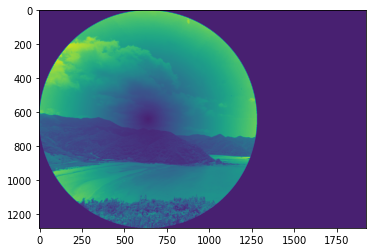

In [94]:
plt.imshow(0.3*goto*circle_sine)